# Import external and internal modules

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from mpl_toolkits.basemap import Basemap
import math
import zipfile

In [4]:
from modules.utils import *
# importlib.reload(modules.utils)
from modules.utils import *

# Read grid data

In [6]:
lat_csv = 'data/latitude_EASE.csv'
lon_csv = 'data/longitude_EASE.csv'
grid = generate_ease_grid(lat_csv, lon_csv)
print(grid.shape)

(361, 361, 2)


# Draw the EASE grid on map

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


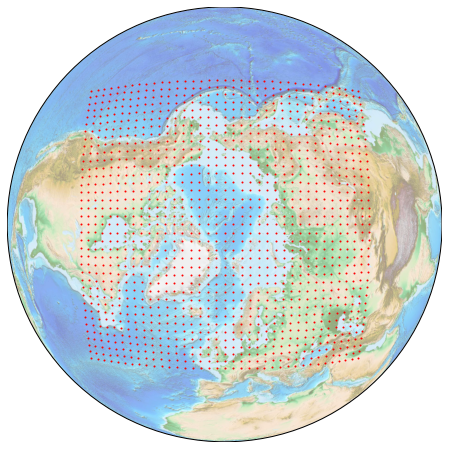

In [4]:
# earth view
fig = plt.figure(figsize=(8, 8), edgecolor='w')
draw_map([], [], grid, fig, projection='ortho')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


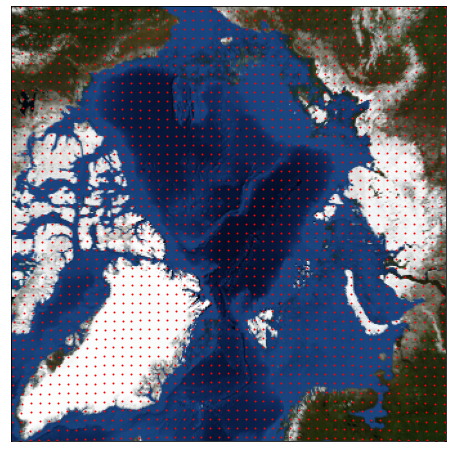

In [5]:
# zoomed view
fig = plt.figure(figsize=(8, 8), edgecolor='w')
draw_map([], [], grid, fig, projection='stere', grid_res=4, width=5000000, height=5000000)

# convert cartesian coordinates of buoys on the EASE grid to latitude and longitude

# Read the sea ice dataset

In [7]:
data = read_dataset('data/DRIFT_DATA_TRAIN.csv')
print(data.describe())
'''
data cleaning up
'''
# Remove any rows that have buoy velocity/mag =0 
data = data.drop(data[data["u_buoy"]*data["v_buoy"] == 0].index)
data = data.reset_index()

# average the ice thickness from two measurements
temp = [None]*data.shape[0]
# iterate through all the rows and check if thickness is 0
for index, row in data.iterrows():
    if row["h_piomas"] == 0 :  
        if row["h_cs2smos"] > 0: 
            temp[index] = row["h_cs2smos"]
        elif row['sic_CDR'] < 0.001:
            temp[index] = 0
            
    elif row["h_piomas"] > 0:
        if row["h_cs2smos"] > 0:
            temp[index] = (row["h_cs2smos"] + row["h_piomas"])/2
        else: 
            temp[index] = row["h_piomas"]
            
    else:
         if row["h_cs2smos"] > 0:
            temp[index] = row["h_cs2smos"]
   
        

data["ice_thickness"] = temp            

# drop original thickness columns
data = data.drop(['h_piomas', 'h_cs2smos'], axis = 1)

# frop nan rows
data = data.dropna()

# convert x_EASE and y_EASE to lat and lon
# convert velocity components to magnitude and angle
lats = []
lons = []
buoy_vel_mags = []
buoy_vel_dirs = []
wind_vel_mags = []
wind_vel_dirs = []
for index, row in data.iterrows(): 
    # coordinate conversion
    x = row['x_EASE']
    y = row['y_EASE']
    lat, lon = interpolate_coordinate(x, y, grid)
    lats.append(lat)
    lons.append(lon)

    # buoy velocity conversion
    buoy_mag, buoy_dir = caonvert_vel_vector(row['u_buoy'], row['v_buoy'])
    buoy_vel_mags.append(buoy_mag)
    buoy_vel_dirs.append(buoy_dir)

    # wind velocity conversion
    wind_mag, wind_dir = caonvert_vel_vector(row['u_ERA5'], row['v_ERA5'])
    wind_vel_mags.append(wind_mag)
    wind_vel_dirs.append(wind_dir)

# add the converted data to dataset
data['buoy_lat'] = lats
data['buoy_lon'] = lons
data['buoy_vel_mag'] = buoy_vel_mags
data['buoy_vel_dir'] = buoy_vel_dirs
data['wind_vel_mag'] = wind_vel_mags
data['wind_vel_dir'] = wind_vel_dirs

# remove unwanted columns
data = data.drop(['u_buoy', 'v_buoy', 'u_ERA5', 'v_ERA5', 'x_EASE', 'y_EASE'], axis = 1)  

# save the converted x_EASE and y_EASE to csv file
data.to_csv('data/converted.csv', index=False)  

                year          month            day            doy  \
count  339478.000000  339478.000000  339478.000000  339478.000000   
mean     2007.013774       6.749374      15.744955     190.020314   
std         9.822726       3.454148       8.752622     105.562830   
min      1979.000000       1.000000       1.000000       1.000000   
25%      2000.000000       4.000000       8.000000     101.000000   
50%      2009.000000       7.000000      16.000000     190.000000   
75%      2015.000000      10.000000      23.000000     285.000000   
max      2019.000000      12.000000      31.000000     364.000000   

              x_EASE         y_EASE         u_buoy         v_buoy  \
count  339478.000000  339478.000000  339478.000000  339478.000000   
mean      163.595093     156.507375      -0.333029       1.359709   
std        24.451743      34.697790       8.072700       7.860918   
min        39.168983      36.870293     -74.682899     -66.781601   
25%       146.809723     129.2088

In [11]:
# normalize the thickness
data['ice_thick_norm'] =(data['ice_thickness'] - data['ice_thickness'].min()) / (data['ice_thickness'].max() - data['ice_thickness'].min())
print(data['ice_thick_norm'].head(20))
data['h_piomas'].min()

0     0.507543
1     0.395249
2     0.393673
3     0.595182
4     0.507349
5     0.409603
6     0.396262
7     0.394693
8     0.397732
9     0.401867
10    0.508152
11    0.410438
12    0.395659
13    0.597079
14    0.398509
15    0.455618
16    0.509984
17    0.411253
18    0.398199
19    0.396600
Name: ice_thick_norm, dtype: float64


KeyError: 'h_piomas'

# Visualize the dataset as a time series

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

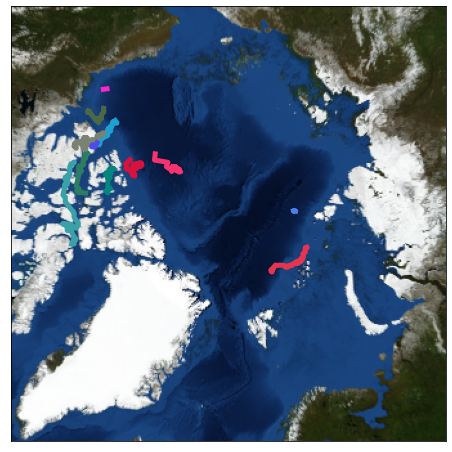

In [76]:
year = 1985
df = data[data['year'] == year]
buoys_list = pd.unique(df['id_buoy'])

fig = plt.figure(figsize=(8, 8), edgecolor='w')
for b in buoys_list:
    df_b = df[df['id_buoy'] == b]
    df_b = df_b[['buoy_lat', 'buoy_lon']]
    lat, lon = df_b['buoy_lat'].to_list(), df_b['buoy_lon'].to_list()

    draw_map(lat, lon, grid, fig, projection='stere', show_grid=False, grid_res=4, width=5000000, height=5000000)

id_buoy
5300     14
5315     12
2416     12
3690     11
5312     11
         ..
44880     1
44960     1
45050     1
45390     1
99800     1
Name: year, Length: 1631, dtype: int64
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow w

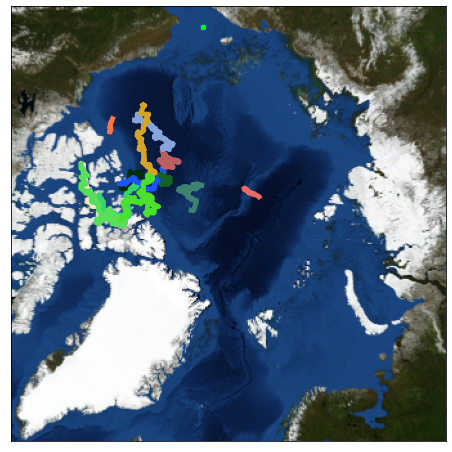

In [83]:
# find the most repeated buoy
dfl = data.groupby('id_buoy')['year'].nunique()
dfl = dfl.sort_values(ascending=False)
print(dfl)

buoy = 5300
df = data[data['id_buoy'] == buoy]
year_list = pd.unique(df['year'])

fig = plt.figure(figsize=(8, 8), edgecolor='w')
for y in year_list:
    df_b = df[df['year'] == y]
    df_b = df_b[['buoy_lat', 'buoy_lon']]
    lat, lon = df_b['buoy_lat'].to_list(), df_b['buoy_lon'].to_list()

    draw_map(lat, lon, grid, fig, projection='stere', show_grid=False, grid_res=4, width=5000000, height=5000000);

# Create frames for gif animation

In [158]:
year = 1979
df = data[data['year'] == year]
buoys_list = pd.unique(df['id_buoy'])
month_list = pd.unique(df['month'])

lat_avg = df.groupby(['month','id_buoy']).agg({'buoy_lat': ['mean']})     #agg({'buoy_lat': ['mean', 'min', 'max','std']})
lon_avg = df.groupby(['month','id_buoy']).agg({'buoy_lon': ['mean']}) 
thickness = df.groupby(['month','id_buoy']).agg({'h_piomas': ['mean']}) 

lat_avg.loc[2, ('buoy_lat', 'mean')]
print((lat_avg.loc[2, ('buoy_lat', 'mean')]).values)

fig = plt.figure(figsize=(8, 8), edgecolor='w')
for m in month_list:
    df_b = df[df['id_buoy'] == b]
    df_b = df_b[['buoy_lat', 'buoy_lon']]
    lat, lon = df_b['buoy_lat'].to_list(), df_b['buoy_lon'].to_list()

    draw_map(lat, lon, grid, fig, projection='stere', show_grid=False, grid_res=4, width=5000000, height=5000000)

               h_piomas
                   mean
month id_buoy          
2     1905     2.555834
      1906     3.212174
      1911     2.643643
      1913     2.516717
      1914     2.490154
...                 ...
12    1914     2.463231
      1915     2.226385
      1918     2.428403
      1923     2.820288
      1925     2.899240

[99 rows x 1 columns]
[83.16367255 78.01266926 75.98767807 74.5154634  74.00401685 81.03732375
 81.64890759 73.85260652]


<Figure size 576x576 with 0 Axes>

Plot density map with data lat, lon and sea ice thickness for 1986.

In [12]:
import plotly.graph_objects as go 
sample = data[data["year"] == 1986]
fig = go.Figure(go.Densitymapbox(lat=sample.buoy_lat, lon=sample.buoy_lon, z=sample.ice_thick_norm, radius=10))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()